
# Trabajo Práctico 2


Descargar el dataset **Facebook comment volume** https://archive.ics.uci.edu/ml/datasets/Facebook+Comment+Volume+Dataset. 

El dataset tiene diferentes versiones, utilizaremos la **número 5** para train y para test **Features_TestSet**. 

Notar que trae **carpeta de train y de test**. 

Una descripcióm completa del dataset pueden encontrarla en el link. Se trata de publicaciones de Facebook y se quiere **predecir la columna 54: cantidad de comentarios en las próximas H horas"**.

El dataset contiene variables en muchos formatos diferentes, algunos de los cuales no hemos trabajado o no lo hemos hechos en profundidad. Esas variables pueden ser descartadas o bien hacer una investigación personal para ver de qué manera poder incluirlas para mejorar los resultados obtenidos.


# Importar librerías

Importar aquellas librerías que serán utilizadas en el trabajo.

In [1]:
#from sklearn import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.preprocessing import PolynomialFeatures

#import matplotlib
import seaborn as sns
#from pandas.plotting import scatter_matrix

#from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
#from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import max_error

# Cargar datos
Cargar los datos de entrenamiento.

In [2]:
PATH_Train = "C:/Users/rfi7/Downloads/TP2 Data/Dataset/Dataset/Training"
PATH_Test = "C:/Users/rfi7/Downloads/TP2 Data/Dataset/Dataset/Testing/TestSet"

train = pd.read_csv(os.path.join(PATH_Train, "Features_Variant_5.csv"), header=None)
test = pd.read_csv(os.path.join(PATH_Test, "Test_Case_5.csv"), header=None)


# Análisis exploratorio básico y preprocesamiento de los datos

Análisis de los datos para conocer los mismos, ver datos faltantes, decidir cómo tratarlos, ver distribuciones, relaciones, etc. Procesar los datos centrándolos, reescalando, codificando, reduciendo dimensiones, etc. según considere necesario. 

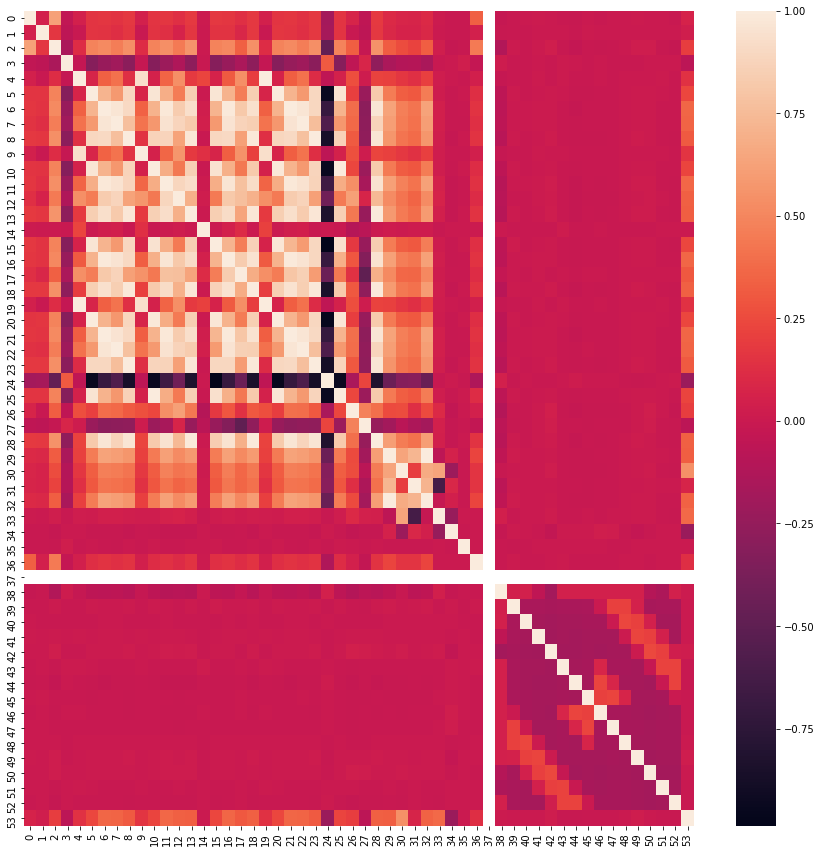

In [3]:
# Muestro graficamente la correlacion entre datos de train

corr_train = train.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(corr_train)

In [4]:
# Separo los datasets de train y test en features x y salida y
# La salida y es la ultima columna 

shape_train = np.shape(train)

# separo x de y en dataset de training. 'y' es la última columna del dataset
x_train = train.iloc[:, 0:np.shape(train)[1]-1]
y_train = train.iloc[:, np.shape(train)[1]-1]

# separo x de y en dataset de test 
x_test = test.iloc[:, 0:np.shape(test)[1]-1]
y_test = test.iloc[:, np.shape(test)[1]-1]

# Imprimo el shape de cada dataset 
print('x training', np.shape(x_train))
print('y training', np.shape(y_train))

print('x test', np.shape(x_test))
print('y test', np.shape(y_test))

x training (199030, 53)
y training (199030,)
x test (100, 53)
y test (100,)


In [5]:
# Muestro la correlacion matriz de correlacion con los datos escalados
scaler = StandardScaler(with_mean=True)




In [6]:
# Describo los features del dataset de training  
x_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
count,1.990300e+05,199030.000000,1.990300e+05,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,...,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.00000
mean,1.313785e+06,4674.517731,4.477173e+04,24.242074,0.470256,485.317656,55.901120,35.263538,68.090731,0.068135,...,0.144184,0.146209,0.136954,0.139391,0.134829,0.136788,0.147088,0.155298,0.144245,0.14236
std,6.771131e+06,20573.440641,1.108983e+05,19.935334,13.178067,538.194418,86.515496,68.162671,82.411057,2.172591,...,0.351277,0.353317,0.343800,0.346355,0.341542,0.343625,0.354195,0.362190,0.351338,0.34942
min,3.600000e+01,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.673400e+04,0.000000,6.980000e+02,9.000000,0.000000,49.000000,5.494737,2.000000,8.033255,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,2.929110e+05,0.000000,7.237000e+03,18.000000,0.000000,256.000000,23.647407,12.000000,35.022296,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.204214e+06,99.000000,5.026400e+04,32.000000,0.000000,784.000000,70.931961,41.000000,104.152684,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,4.869723e+08,186370.000000,6.089942e+06,106.000000,1458.000000,2495.000000,2031.000000,2123.000000,762.357746,227.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [7]:
# Describo la salida del dataset de training 
y_train.describe()

count    199030.000000
mean          7.168708
std          34.298193
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max        1702.000000
Name: 53, dtype: float64

In [8]:
# Guardo un backup de los datos para seguir depurando 
x_trainBk = x_train
y_trainBk = y_train

# separo x de y en dataset de test 
x_testBk = x_test
y_testBk = y_test

In [9]:
print (x_train.shape)
print (x_test.shape)

x_train_bias = np.vstack((x_train.T, np.ones(199030))).T
x_test_bias = np.vstack((x_test.T,np.ones(100))).T

x_train_exp = np.vstack((x_train_bias.T, x_train[30].T ** 2)).T
x_test_exp = np.vstack((x_test_bias.T, x_test[30].T ** 2)).T
print (x_train_exp.shape)
print (x_test_exp.shape)

(199030, 53)
(100, 53)
(199030, 55)
(100, 55)


# Modelos y evaluación
Probar diferentes modelos para predecir la variable objetivo. Calcular las métricas que considere relevantes. Comentar los resultados. 

Independent term: 
 -5.1138622372369005
Mean squared error: 1860.39
Variance score: 0.51


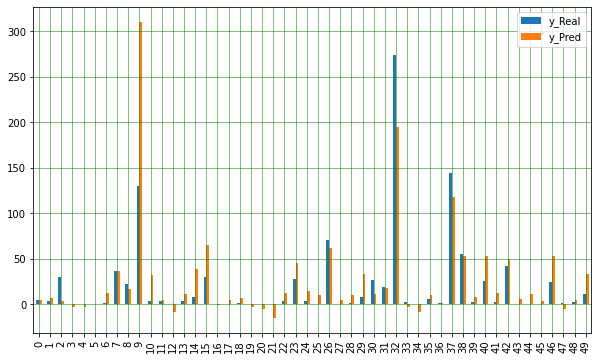

In [10]:
#Creamos el objeto de Regresión Linear
regr = LinearRegression()
 
#Entrenamos nuestro modelo
regr.fit(x_train, y_train)
 
#Hacemos las predicciones
y_pred = regr.predict(x_test)
 
#Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
#Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
#Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_test, y_pred))

data = {'y_Real':    y_test[0:100],
        'y_Pred': y_pred[0:100]
        }

df = pd.DataFrame(data, columns=['y_Real','y_Pred'])

#Presenta los primeros 50 datos del dataset de test para compararlo con la estimacion
n = 50
df1 = df.head(n)
df1.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


Observamos que hay predicciones con valores negativos, es posible que con agregando términos cuadráticos se pueda mejorar la predicción, para ello seleccionamos los 10 features que al agregarlos al modelo con valores cuadráticos, mejoren el error mínimo cuadrático.
 Y luego volvemos a entrenar el modelos con estos nuevos parámetros de entrada, y comparamos los resultados.

In [11]:
print (x_train.shape)
print (x_test.shape)


emq = np.empty(53)

for i in range(53):

    x_train_exp = np.vstack((x_train_bias.T, x_train[i].T ** 2)).T
    x_test_exp = np.vstack((x_test_bias.T, x_test[i].T ** 2)).T
    # Creamos el objeto de Regresión Linear
    regr = LinearRegression()

    # Entrenamos nuestro modelo
    regr.fit(x_train_exp, y_train)

    # Hacemos las predicciones
    y_pred = regr.predict(x_test_exp)
    
    emq[i] = mean_squared_error(y_test, y_pred)

    # Este es el valor donde corta el eje Y (en X=0)
    print('Independent term: \n', regr.intercept_)
    # Error Cuadrado Medio
    print ("i=",i)
    print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    # Puntaje de Varianza. El mejor puntaje es un 1.0
    print('Variance score: %.2f' % r2_score(y_test, y_pred))
    

(199030, 53)
(100, 53)
Independent term: 
 -4.118650535402009
i= 0
Mean squared error: 1564.05
Variance score: 0.59
Independent term: 
 -5.103630700955956
i= 1
Mean squared error: 1868.20
Variance score: 0.51
Independent term: 
 -5.999077693163247
i= 2
Mean squared error: 2331.05
Variance score: 0.39
Independent term: 
 -5.208534880804158
i= 3
Mean squared error: 1857.50
Variance score: 0.52
Independent term: 
 -5.117095611656953
i= 4
Mean squared error: 1825.57
Variance score: 0.52
Independent term: 
 -5.137590362290118
i= 5
Mean squared error: 1861.26
Variance score: 0.51
Independent term: 
 -5.072641443803074
i= 6
Mean squared error: 1875.61
Variance score: 0.51
Independent term: 
 -5.096049729064588
i= 7
Mean squared error: 1895.60
Variance score: 0.51
Independent term: 
 -5.17653112118609
i= 8
Mean squared error: 1874.97
Variance score: 0.51
Independent term: 
 -5.118186364409413
i= 9
Mean squared error: 1765.79
Variance score: 0.54
Independent term: 
 -5.171970217795475
i= 10
Mea

In [12]:
best_features = np.argsort(emq)

print(emq)
print(np.argsort(emq))


[   1564.05176547    1868.19595721    2331.04577822    1857.5025732
    1825.56998156    1861.26157183    1875.60844566    1895.59866177
    1874.96957026    1765.79387271    1858.41088106    1868.56906662
    1848.07873845    1862.6671783  1455441.66440455    1858.61017598
    1878.26931551    1898.45830638    1849.98741288    1828.7169208
    1861.15027788    1885.54375144    1908.49061385    1868.94861087
    1855.96471       1859.0043539     1888.30002568    1811.6766352
    1855.44210548    1980.99314806    1848.32119323    1776.55252867
    1949.34898199    1859.10426801    1761.97711202    1860.45165059
    2089.07560698    1860.39408142    1864.43447994    1860.39408142
    1860.39408142    1860.39408142    1860.39408142    1860.39408142
    1860.39408142    1860.39408142    1860.39408142    1860.39408142
    1860.39408142    1860.39408142    1860.39408142    1860.39408142
    1860.39408142]
[ 0 34  9 31 27  4 19 12 30 18 28 24  3 10 15 25 33 45 42 47 49 44 40 46
 50 41 51 37 4

Independent term: 
 9.377323122175255
i= 52
Mean squared error: 11563.92
Variance score: -2.02


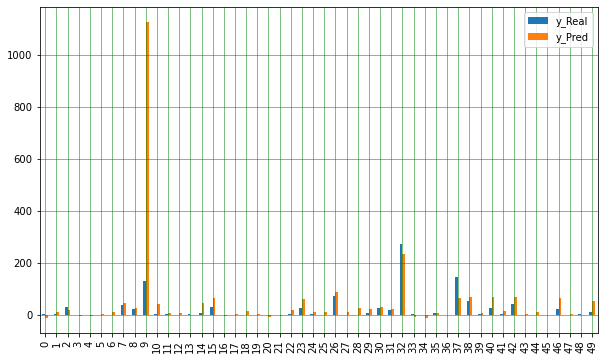

In [13]:
x_train_exp1 = np.vstack((x_train_exp.T, x_train[best_features[0]].T ** 2)).T
x_test_exp1 = np.vstack((x_test_exp.T, x_test[best_features[0]].T ** 2)).T

x_train_exp2 = np.vstack((x_train_exp1.T, x_train[best_features[1]].T ** 2)).T
x_test_exp2 = np.vstack((x_test_exp1.T, x_test[best_features[1]].T ** 2)).T

x_train_exp3 = np.vstack((x_train_exp2.T, x_train[best_features[2]].T ** 2)).T
x_test_exp3 = np.vstack((x_test_exp2.T, x_test[best_features[2]].T ** 2)).T

x_train_exp4 = np.vstack((x_train_exp3.T, x_train[best_features[3]].T ** 2)).T
x_test_exp4 = np.vstack((x_test_exp3.T, x_test[best_features[3]].T ** 2)).T

x_train_exp5 = np.vstack((x_train_exp4.T, x_train[best_features[4]].T ** 2)).T
x_test_exp5 = np.vstack((x_test_exp4.T, x_test[best_features[4]].T ** 2)).T

x_train_exp6 = np.vstack((x_train_exp5.T, x_train[best_features[5]].T ** 2)).T
x_test_exp6 = np.vstack((x_test_exp5.T, x_test[best_features[5]].T ** 2)).T

x_train_exp7 = np.vstack((x_train_exp6.T, x_train[best_features[6]].T ** 2)).T
x_test_exp7 = np.vstack((x_test_exp6.T, x_test[best_features[6]].T ** 2)).T

x_train_exp8 = np.vstack((x_train_exp7.T, x_train[best_features[7]].T ** 2)).T
x_test_exp8 = np.vstack((x_test_exp7.T, x_test[best_features[7]].T ** 2)).T

x_train_exp9 = np.vstack((x_train_exp8.T, x_train[best_features[8]].T ** 2)).T
x_test_exp9 = np.vstack((x_test_exp8.T, x_test[best_features[8]].T ** 2)).T

x_train_exp10 = np.vstack((x_train_exp9.T, x_train[best_features[9]].T ** 2)).T
x_test_exp10 = np.vstack((x_test_exp9.T, x_test[best_features[9]].T ** 2)).T




# Creamos el objeto de Regresión Linear
regr = LinearRegression()

# Entrenamos nuestro modelo
regr.fit(x_train_exp10, y_train)

# Hacemos las predicciones
y_pred = regr.predict(x_test_exp10)

emq[i] = mean_squared_error(y_test, y_pred)

# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print ("i=",i)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_test, y_pred))


data = {'y_Real':    y_test[0:100],
        'y_Pred': y_pred[0:100]
        }

df = pd.DataFrame(data, columns=['y_Real','y_Pred'])

#Presenta los primeros 50 datos del dataset de test para compararlo con la estimacion
n = 50
df1 = df.head(n)
df1.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


## Conclusión, si bien logramos reducir significativamente las predicciones con valores negativos, el modelo empeoró respecto al primero.